#### 1. Data Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Dataset 1: Chronic Disease and Air Quality
# CDC: Annual State-Level U.S. Chronic Disease Indicators
CDC_chronic_diseases = pd.read_csv('CDC_chronic_diseases.csv')
CDC_chronic_diseases

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3229: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2011,2011,AK,Alaska,NVSS,Cardiovascular Disease,Mortality from coronary heart disease,NaN,NaN,Number,...,2,CVD,CVD1_3,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
1,2014,2014,AK,Alaska,NVSS,Cardiovascular Disease,Mortality from heart failure,NaN,NaN,Number,...,2,CVD,CVD1_4,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
2,2017,2017,AK,Alaska,SEDD; SID,Cardiovascular Disease,Hospitalization for stroke,NaN,NaN,Number,...,2,CVD,CVD3_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
3,2017,2017,AL,Alabama,NVSS,Asthma,Asthma mortality rate,NaN,NaN,Number,...,1,AST,AST4_1,NMBR,RACE,WHT,NaN,NaN,NaN,NaN
4,2015,2015,AL,Alabama,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,1,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082323,2020,2020,WA,Washington,BRFSS,"Nutrition, Physical Activity, and Weight Status",Obesity among adults aged >= 18 years,NaN,%,Crude Prevalence,...,53,NPAW,NPAW1_1,CRDPREV,RACE,BLK,NaN,NaN,NaN,NaN
1082324,2020,2020,WV,West Virginia,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of current smoking among adults >= ...,NaN,%,Age-adjusted Prevalence,...,54,COPD,COPD3_0_1,AGEADJPREV,RACE,WHT,NaN,NaN,NaN,NaN
1082325,2020,2020,WY,Wyoming,BRFSS,Chronic Obstructive Pulmonary Disease,Influenza vaccination among noninstitutionaliz...,NaN,%,Crude Prevalence,...,56,COPD,COPD7_0,CRDPREV,RACE,WHT,NaN,NaN,NaN,NaN
1082326,2020,2020,VT,Vermont,BRFSS,Overarching Conditions,Self-rated health status among women aged 18-4...,NaN,%,Crude Prevalence,...,50,OVC,OVC6_2,CRDPREV,RACE,OTH,NaN,NaN,NaN,NaN


In [3]:
# CDC:  Chronic Obstructive Pulmonary Disease (COPD) 
CDC_COPD = pd.read_csv('CDC_COPD.csv')
CDC_COPD

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2015,2015,AK,Alaska,NVSS,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,NaN,"cases per 100,000",Age-adjusted Rate,...,2,COPD,COPD1_2,AGEADJRATE,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2015,2015,AK,Alaska,CMS Part A Claims Data,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,NaN,"cases per 1,000",Age-adjusted Rate,...,2,COPD,COPD5_4,AGEADJRATE,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2011,2011,AL,Alabama,NVSS,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,NaN,"cases per 100,000",Crude Rate,...,1,COPD,COPD1_1,CRDRATE,RACE,WHT,NaN,NaN,NaN,NaN
3,2017,2017,AL,Alabama,SEDD; SID,Chronic Obstructive Pulmonary Disease,Emergency department visit rate for chronic ob...,NaN,NaN,Number,...,1,COPD,COPD6_2,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
4,2017,2017,AR,Arkansas,NVSS,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,NaN,"cases per 100,000",Crude Rate,...,5,COPD,COPD1_1,CRDRATE,GENDER,GENM,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142699,2020,2020,VT,Vermont,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,NaN,%,Age-adjusted Prevalence,...,50,COPD,COPD2_0_1,AGEADJPREV,RACE,HIS,NaN,NaN,NaN,NaN
142700,2020,2020,VT,Vermont,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of current smoking among adults >= ...,NaN,%,Crude Prevalence,...,50,COPD,COPD3_0,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
142701,2020,2020,WI,Wisconsin,BRFSS,Chronic Obstructive Pulmonary Disease,Pneumococcal vaccination among noninstitutiona...,NaN,%,Age-adjusted Prevalence,...,55,COPD,COPD8_0,AGEADJPREV,RACE,HIS,NaN,NaN,NaN,NaN
142702,2020,2020,WV,West Virginia,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of current smoking among adults >= ...,NaN,%,Age-adjusted Prevalence,...,54,COPD,COPD3_0_1,AGEADJPREV,RACE,WHT,NaN,NaN,NaN,NaN


In [4]:
# CDC Daily Census-Tract PM2.5 Concentrations for years 2011 -2014
pm25_2011 = pd.read_csv("Daily_Census_Tract-Level_PM2.5_Concentrations__2011.csv")
pm25_2012 = pd.read_csv("Daily_Census_Tract-Level_PM2.5_Concentrations__2012.csv")
pm25_2013 = pd.read_csv("Daily_Census_Tract-Level_PM2.5_Concentrations__2013.csv")
pm25_2014 = pd.read_csv("Daily_Census_Tract-Level_PM2.5_Concentrations__2014.csv")
pm25_2011

,year,date,statefips,countyfips,ctfips,latitude,longitude,ds_pm_pred,ds_pm_stdd
0,2011,16JAN2011,36,36067,36067016802,42.86482,-76.22294,7.163089,4.463915
1,2011,16JAN2011,36,36067,36067016901,42.81138,-76.13510,7.112696,4.424604
2,2011,16JAN2011,36,36067,36067016902,42.82194,-75.99122,7.090876,4.403247
3,2011,16JAN2011,36,36067,36067940000,42.94020,-76.15772,7.663674,4.654235
4,2011,16JAN2011,36,36069,36069050101,43.00244,-77.45370,6.471819,4.124993
...,...,...,...,...,...,...,...,...,...
3837580,2011,10MAR2011,39,39113,39113080500,39.82286,-84.20442,7.902707,2.407351
3837581,2011,10MAR2011,39,39113,39113080600,39.79832,-84.18509,7.929683,2.320257
3837582,2011,10MAR2011,39,39113,39113080700,39.81584,-84.17165,8.002682,2.339427
3837583,2011,10MAR2011,39,39113,39113090302,39.80024,-84.13126,8.227707,2.427825


#### 2. EDA

__•Visualize at least two quantitative variables and two categorical variables. Your visualizations
must be relevant to your research questions!__

- Quantitative variables: pm2.5 emission(annual mean), average rates of COPD
- Categorical variables: State, Hospitalization reason


__• Describe any trends you observe, and any relationships you may want to follow up on.__

- The relationship between yearly avg pm25 levels and COPD shows majority of data points clustered in the lower left quadrant of the scatter plot. Lower COPD rate has lower yearly average PM2.5 concentration levels.
- The yearly average PM2.5 concentration levels are not largely different across years. It appears years 2011 and 2014 have similar average PM2.5 concentration levels. And year 2012 has the lowest average PM2.5 concentration level whereas year 2013 has the highest. 
- The hospitalization reason 'Emergency department visit rate for chronic obstructive pulmonary disease as any diagnosis' stands out as having the highest COPD rate. The hospitalization reasons 'Hospitalization for chronic obstructive pulmonary disease as first-listed diagnosis among Medicare-eligible persons aged >= 65 years' and 'Hospitalization for chronic obstructive pulmonary disease as first-listed diagnosis' have significantly lower COPD rates.
- Kentucky appears to have the highest average COPD rate out of all the states. 
- Utah appears to have the highest yearly average PM2.5 concentration levels out of all the states.

May want to follow up on average COPD rate and yearly average PM2.5 concentration levels confounding factors.

__• Describe any data cleaning steps you took. How will these decisions impact your models and
inferences?__

When loading the CDC COPD rates and PM25 Concentration datasets, there were multiple columns with only null/nan values, so the first step in cleaning the datasets was removing these columns. For the CDC COPD dataset, we looked at the Data Value Type that was specifically Age-adjusted Rate and created datasets that looked at COPD rates based on Race/Ethnicity and Gender, which may be confounders. For the PM25 concentration dataset, we loaded the Daily Census Tract-Level PM2.5 Concentrations for each year between 2011 and 2014 separately due to size. For each individual dataset, we grouped by state FIPS and took the mean over ds_pm_pred, which is the mean estimated 24-hour average PM2.5 concentration in μg/m3. We then merged the PM25 concentration dataset and COPD rates dataset based on year and state FIPS (PM25 concentration DS)/ LocationID (COPD rates DS). A decision made when cleaning the data that will impact our model and decisions was taking the annual mean by state PM2.5 emission; however, aggregating smooths out the data and allows for a more accurate analysis. We also converted all of the COPD rates into percentages in order to have a uniform dataset. 


__• Explain how your visualizations should be relevant to your research questions: either by motivating the question, or suggesting a potential answer. You must explain why they are relevant.__

Research Questions: <br>
1. Do increased levels of air pollution correspond with increased levels of Chronic Obstructive Pulmonary Disease (COPD)? We compute the average difference in rates of COPD in high air pollution areas and compare it to the average difference in rates of COPD in low air pollution areas. The first visualization is a simple graphic that shows trends relevant to levels of COPD. We can also look into splitting up the data by year to see how COPD levels change over time if at all. From this graphic, we can see that a simple comparison of PM2.5 levels to COPD rates have no clear correlation. This is likely due to confounding factors like location, age, and pre-existing conditions. <br>
2. Do increased regulations correspond with decreased chronic illnesses? The unit we are using to look regulations is at the state level. The last two graphics looking at the average COPD and PM2.5 concentration levels are separated by state- will give us a basis to look at state regulations. State regulations is an instrumental variable because regulations can have an effect on air pollution levels but pollution regulations will have no direct impact on the rates of COPD.<br>

In [5]:
# dropping columns with null values
CDC_chronic_diseases[CDC_chronic_diseases['Response'].notnull()]
CDC_chronic_diseases_clean = CDC_chronic_diseases.drop(['Response','StratificationCategory2','Stratification2','StratificationCategory3','Stratification3','StratificationCategoryID2','StratificationID2','StratificationCategoryID3','StratificationID3','ResponseID'], axis=1)

In [6]:
# dropping columns with null values
CDC_COPD[CDC_COPD["Response"].notnull()]
CDC_COPD_clean = CDC_COPD.drop(["Response", "ResponseID",'StratificationCategory2','Stratification2','StratificationCategory3','Stratification3','StratificationCategoryID2','StratificationID2','StratificationCategoryID3','StratificationID3'], axis = 1)
CDC_COPD_clean

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2015,2015,AK,Alaska,NVSS,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,"cases per 100,000",Age-adjusted Rate,216.5,...,194.10,238.80,Overall,Overall,2,COPD,COPD1_2,AGEADJRATE,OVERALL,OVR
1,2015,2015,AK,Alaska,CMS Part A Claims Data,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,"cases per 1,000",Age-adjusted Rate,45.5,...,43.77,47.23,Overall,Overall,2,COPD,COPD5_4,AGEADJRATE,OVERALL,OVR
2,2011,2011,AL,Alabama,NVSS,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,"cases per 100,000",Crude Rate,172.4,...,165.70,179.10,Race/Ethnicity,"White, non-Hispanic",1,COPD,COPD1_1,CRDRATE,RACE,WHT
3,2017,2017,AL,Alabama,SEDD; SID,Chronic Obstructive Pulmonary Disease,Emergency department visit rate for chronic ob...,NaN,Number,NaN,...,NaN,NaN,Gender,Female,1,COPD,COPD6_2,NMBR,GENDER,GENF
4,2017,2017,AR,Arkansas,NVSS,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,"cases per 100,000",Crude Rate,190.2,...,179.10,201.30,Gender,Male,5,COPD,COPD1_1,CRDRATE,GENDER,GENM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142699,2020,2020,VT,Vermont,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,NaN,...,NaN,NaN,Race/Ethnicity,Hispanic,50,COPD,COPD2_0_1,AGEADJPREV,RACE,HIS
142700,2020,2020,VT,Vermont,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of current smoking among adults >= ...,%,Crude Prevalence,38.5,...,32.60,44.70,Overall,Overall,50,COPD,COPD3_0,CRDPREV,OVERALL,OVR
142701,2020,2020,WI,Wisconsin,BRFSS,Chronic Obstructive Pulmonary Disease,Pneumococcal vaccination among noninstitutiona...,%,Age-adjusted Prevalence,NaN,...,NaN,NaN,Race/Ethnicity,Hispanic,55,COPD,COPD8_0,AGEADJPREV,RACE,HIS
142702,2020,2020,WV,West Virginia,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of current smoking among adults >= ...,%,Age-adjusted Prevalence,47.6,...,42.90,52.20,Race/Ethnicity,"White, non-Hispanic",54,COPD,COPD3_0_1,AGEADJPREV,RACE,WHT


In [7]:
# locationID == statefips in pm25_year tables
CDC_COPD_race = CDC_COPD_clean.loc[(CDC_COPD_clean['DataValueType'] == 'Age-adjusted Rate')]
CDC_COPD_race = CDC_COPD_race.loc[(CDC_COPD_race['StratificationCategory1'] == 'Race/Ethnicity')]
CDC_COPD_race = CDC_COPD_race[CDC_COPD_race['DataValue'].notna()]
CDC_COPD_race =  CDC_COPD_race.drop(['LocationAbbr','YearEnd','TopicID','DataSource', 'DataValueUnit', 'DataValueAlt', 'DataValueType', 'DataValueFootnoteSymbol','DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1', 'DataValueTypeID', 'StratificationCategoryID1','StratificationID1'], axis=1)
CDC_COPD_race.head()

,YearStart,LocationDesc,Topic,Question,DataValue,Stratification1,LocationID,QuestionID
12,2011,Arkansas,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,66.70,"Black, non-Hispanic",5,COPD5_4
13,2012,Alaska,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,233.70,"White, non-Hispanic",2,COPD1_2
25,2010,Arkansas,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,28.43,Asian or Pacific Islander,5,COPD5_4
38,2018,Alabama,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,50.24,Hispanic,1,COPD5_4
51,2013,Arkansas,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,49.50,Asian or Pacific Islander,5,COPD5_4


In [8]:
#One-Hot Encode Race
d = pd.get_dummies(CDC_COPD_race['Stratification1'], prefix='Stratification')
CDC_COPD_race_onehot = pd.concat([CDC_COPD_race, d], axis=1)
CDC_COPD_race_onehot = CDC_COPD_race_onehot.rename(columns= {"Stratification1": "Race/Ethnicity"})
CDC_COPD_race_onehot.head()

,YearStart,LocationDesc,Topic,Question,DataValue,Race/Ethnicity,LocationID,QuestionID,Stratification_American Indian or Alaska Native,Stratification_Asian or Pacific Islander,"Stratification_Black, non-Hispanic",Stratification_Hispanic,"Stratification_White, non-Hispanic"
12,2011,Arkansas,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,66.70,"Black, non-Hispanic",5,COPD5_4,0,0,1,0,0
13,2012,Alaska,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,233.70,"White, non-Hispanic",2,COPD1_2,0,0,0,0,1
25,2010,Arkansas,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,28.43,Asian or Pacific Islander,5,COPD5_4,0,1,0,0,0
38,2018,Alabama,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,50.24,Hispanic,1,COPD5_4,0,0,0,1,0
51,2013,Arkansas,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,49.50,Asian or Pacific Islander,5,COPD5_4,0,1,0,0,0


In [9]:
# locationID == statefips in pm25_year tables
CDC_COPD_gender = CDC_COPD_clean.loc[(CDC_COPD_clean['DataValueType'] == 'Age-adjusted Rate')]
CDC_COPD_gender = CDC_COPD_gender.loc[(CDC_COPD_gender['StratificationCategory1'] == 'Gender')]
CDC_COPD_gender = CDC_COPD_gender[CDC_COPD_gender['DataValue'].notna()]
CDC_COPD_gender =  CDC_COPD_gender.drop(['LocationAbbr','YearEnd','TopicID','DataSource', 'DataValueUnit', 'DataValueAlt', 'DataValueType', 'DataValueFootnoteSymbol','DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1', 'DataValueTypeID', 'StratificationCategoryID1','StratificationID1'], axis=1)
CDC_COPD_gender.head()

,YearStart,LocationDesc,Topic,Question,DataValue,Stratification1,LocationID,QuestionID
48,2010,Arkansas,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,339.50,Male,5,COPD1_2
55,2010,Arkansas,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,13.17,Female,5,COPD5_3
57,2013,Arkansas,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,13.37,Male,5,COPD5_3
63,2010,Arkansas,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,124.20,Female,5,COPD1_1
71,2017,Alaska,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,5.53,Female,2,COPD5_3


In [10]:
#One-Hot Encode Gender
d = pd.get_dummies(CDC_COPD_gender['Stratification1'], prefix='Stratification')
CDC_COPD_gender_onehot = pd.concat([CDC_COPD_gender, d], axis=1)
CDC_COPD_gender_onehot = CDC_COPD_gender_onehot.rename(columns= {"Stratification1": "Gender"})
CDC_COPD_gender_onehot.head()

,YearStart,LocationDesc,Topic,Question,DataValue,Gender,LocationID,QuestionID,Stratification_Female,Stratification_Male
48,2010,Arkansas,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,339.50,Male,5,COPD1_2,0,1
55,2010,Arkansas,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,13.17,Female,5,COPD5_3,1,0
57,2013,Arkansas,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,13.37,Male,5,COPD5_3,0,1
63,2010,Arkansas,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,124.20,Female,5,COPD1_1,1,0
71,2017,Alaska,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,5.53,Female,2,COPD5_3,1,0


In [11]:
# merge the gender and race datasets that were one hot encoded
dfs = [CDC_COPD_gender_onehot, CDC_COPD_race_onehot]
dfs_merged = pd.merge(dfs[0], dfs[1], on = "LocationID", how = "outer")
dfs_merged

,YearStart_x,LocationDesc_x,Topic_x,Question_x,DataValue_x,Gender,LocationID,QuestionID_x,Stratification_Female,Stratification_Male,...,Topic_y,Question_y,DataValue_y,Race/Ethnicity,QuestionID_y,Stratification_American Indian or Alaska Native,Stratification_Asian or Pacific Islander,"Stratification_Black, non-Hispanic",Stratification_Hispanic,"Stratification_White, non-Hispanic"
0,2010,Arkansas,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,339.5,Male,5,COPD1_2,0,1,...,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,66.70,"Black, non-Hispanic",COPD5_4,0,0,1,0,0
1,2010,Arkansas,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,339.5,Male,5,COPD1_2,0,1,...,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,28.43,Asian or Pacific Islander,COPD5_4,0,1,0,0,0
2,2010,Arkansas,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,339.5,Male,5,COPD1_2,0,1,...,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,49.50,Asian or Pacific Islander,COPD5_4,0,1,0,0,0
3,2010,Arkansas,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,339.5,Male,5,COPD1_2,0,1,...,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,10.04,"Black, non-Hispanic",COPD5_3,0,0,1,0,0
4,2010,Arkansas,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,339.5,Male,5,COPD1_2,0,1,...,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,10.17,"Black, non-Hispanic",COPD5_3,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986155,2019,Wyoming,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,254.4,Female,56,COPD1_2,1,0,...,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,106.87,American Indian or Alaska Native,COPD5_4,1,0,0,0,0
986156,2019,Wyoming,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,254.4,Female,56,COPD1_2,1,0,...,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,312.00,"White, non-Hispanic",COPD1_2,0,0,0,0,1
986157,2019,Wyoming,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,254.4,Female,56,COPD1_2,1,0,...,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,4.37,"White, non-Hispanic",COPD5_3,0,0,0,0,1
986158,2019,Wyoming,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,254.4,Female,56,COPD1_2,1,0,...,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,38.58,Hispanic,COPD5_4,0,0,0,1,0


In [12]:
# groupby states and take yearly average of PM2.5 concentrations for 2011
pm25_2011_mean = pm25_2011.groupby("statefips").mean("ds_pm_pred").reset_index()
pm25_2011_mean = pm25_2011_mean.drop(["countyfips","ctfips","latitude", "longitude", "ds_pm_stdd"], axis = 1)
pm25_2011_mean.head()

,statefips,year,ds_pm_pred
0,1,2011.0,10.801224
1,4,2011.0,8.025836
2,5,2011.0,11.077399
3,6,2011.0,9.953601
4,8,2011.0,5.879013


In [13]:
# groupby states and take yearly average of PM2.5 concentrations for 2012-2014
pm25_2012_mean = pm25_2012.groupby("statefips").mean("ds_pm_pred").reset_index()
pm25_2012_mean = pm25_2012_mean.drop(["countyfips","ctfips","latitude", "longitude", "ds_pm_stdd"], axis = 1)
pm25_2013_mean = pm25_2013.groupby("statefips").mean("ds_pm_pred").reset_index()
pm25_2013_mean = pm25_2013_mean.drop(["countyfips","ctfips","latitude", "longitude", "ds_pm_stdd"], axis = 1)
pm25_2014_mean = pm25_2014.groupby("statefips").mean("ds_pm_pred").reset_index()
pm25_2014_mean = pm25_2014_mean.drop(["countyfips","ctfips","latitude", "longitude", "ds_pm_stdd"], axis = 1)

In [14]:
# merge the datasets which were grouped by states and that have yearly averages for PM2.5 concentrations
data_frames = [pm25_2011_mean, pm25_2012_mean, pm25_2013_mean, pm25_2014_mean]
pm25_mean_merged = pd.concat(data_frames)
pm25_mean_merged = pm25_mean_merged.rename(columns = {"statefips":"LocationID"})
pm25_mean_merged.head() #missing statefip 2: Alaska

,LocationID,year,ds_pm_pred
0,1.0,2011.0,10.801224
1,4.0,2011.0,8.025836
2,5.0,2011.0,11.077399
3,6.0,2011.0,9.953601
4,8.0,2011.0,5.879013


In [15]:
# merge the PM2.5 yearly average dataset for years 2011-2014 with the dataset on COPD chronic illness
CDC_COPD_race_2011_2014 = CDC_COPD_race_onehot[CDC_COPD_race_onehot["YearStart"] < 2015]
CDC_COPD_race_2011_2014 = CDC_COPD_race_2011_2014.rename(columns = {"YearStart": "year"})
dfs = [CDC_COPD_race_2011_2014, pm25_mean_merged]
merged_df = pd.merge(dfs[0], dfs[1], on = ["year", "LocationID"])
merged_df

,year,LocationDesc,Topic,Question,DataValue,Race/Ethnicity,LocationID,QuestionID,Stratification_American Indian or Alaska Native,Stratification_Asian or Pacific Islander,"Stratification_Black, non-Hispanic",Stratification_Hispanic,"Stratification_White, non-Hispanic",ds_pm_pred
0,2011,Arkansas,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,66.70,"Black, non-Hispanic",5,COPD5_4,0,0,1,0,0,11.077399
1,2011,Arkansas,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,10.17,"Black, non-Hispanic",5,COPD5_3,0,0,1,0,0,11.077399
2,2011,Arkansas,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,85.10,"Black, non-Hispanic",5,COPD1_1,0,0,1,0,0,11.077399
3,2011,Arkansas,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,174.40,"White, non-Hispanic",5,COPD1_1,0,0,0,0,1,11.077399
4,2011,Arkansas,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,20.41,American Indian or Alaska Native,5,COPD5_3,1,0,0,0,0,11.077399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,2014,Wyoming,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,295.60,"White, non-Hispanic",56,COPD1_2,0,0,0,0,1,3.333728
3112,2014,Wyoming,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,98.48,American Indian or Alaska Native,56,COPD5_4,1,0,0,0,0,3.333728
3113,2014,Wyoming,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,6.16,"White, non-Hispanic",56,COPD5_3,0,0,0,0,1,3.333728
3114,2014,Wyoming,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,162.10,"White, non-Hispanic",56,COPD1_1,0,0,0,0,1,3.333728


[Text(0.5, 0, 'PM25 Concentration (avg/year)'), Text(0, 0.5, 'COPD Rate')]

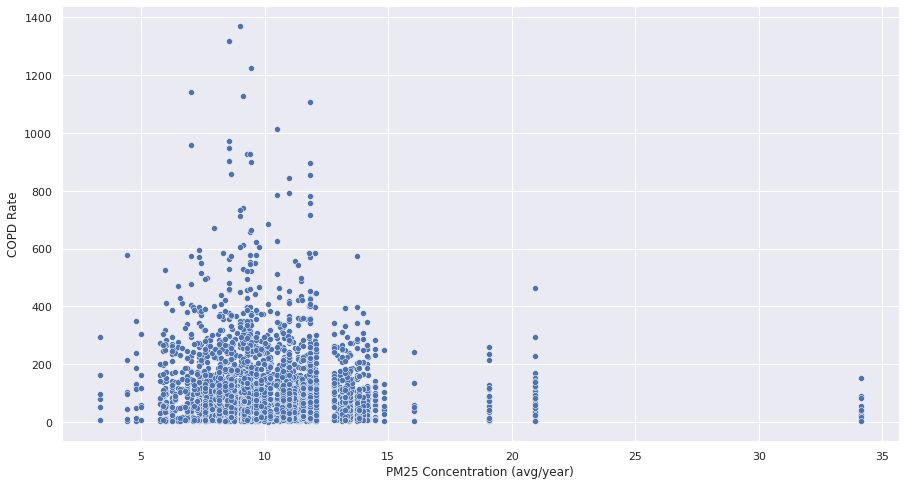

In [16]:
#relationship between yearly avg pm25 levels and COPD 
sns.set(rc = {'figure.figsize':(15,8)})
qs = sns.scatterplot(x='ds_pm_pred', y = 'DataValue', data = merged_df)
qs.set(xlabel='PM25 Concentration (avg/year)', ylabel='COPD Rate')

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'PM25 Concentration')]

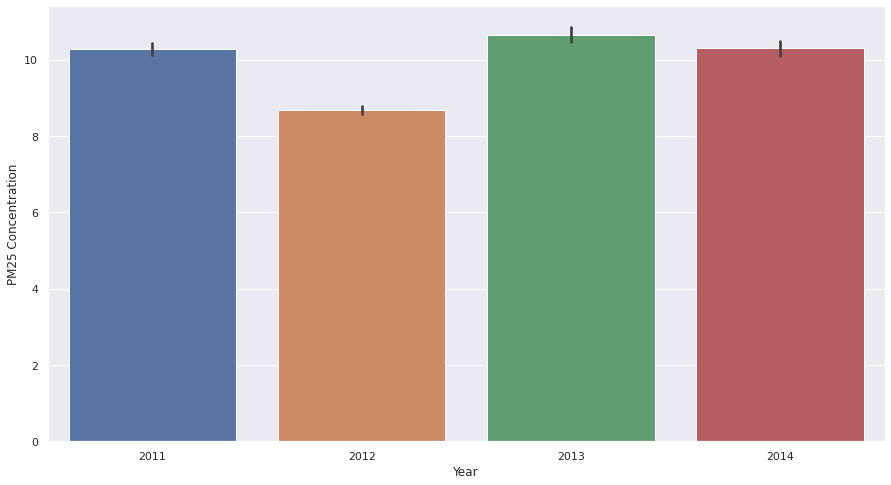

In [17]:
# average pm25 levels per year
#sns.set(rc = {'figure.figsize':(15,8)})
qs = sns.barplot( x = 'year', y='ds_pm_pred', data = merged_df)
qs.set(xlabel='Year', ylabel='PM25 Concentration')

In [18]:
simplified_reasons = np.array(["COPD as any diagnosis for Medicare patients aged >=65", 
    "COPD as a first listed diagnosis for Medicare patients aged >=65",
    "COPD as an underlying cause among adults aged >=45",
    "COPD as underlying or contributing cause among adults aged >=45",
    "COPD as any diagnosis",
    "COPD as first-listed diagnosis",
    "Emergency visit rate for COPD as any diagnosis", 
    "Emergency visit rate for COPD as first-listed diagnosis"])

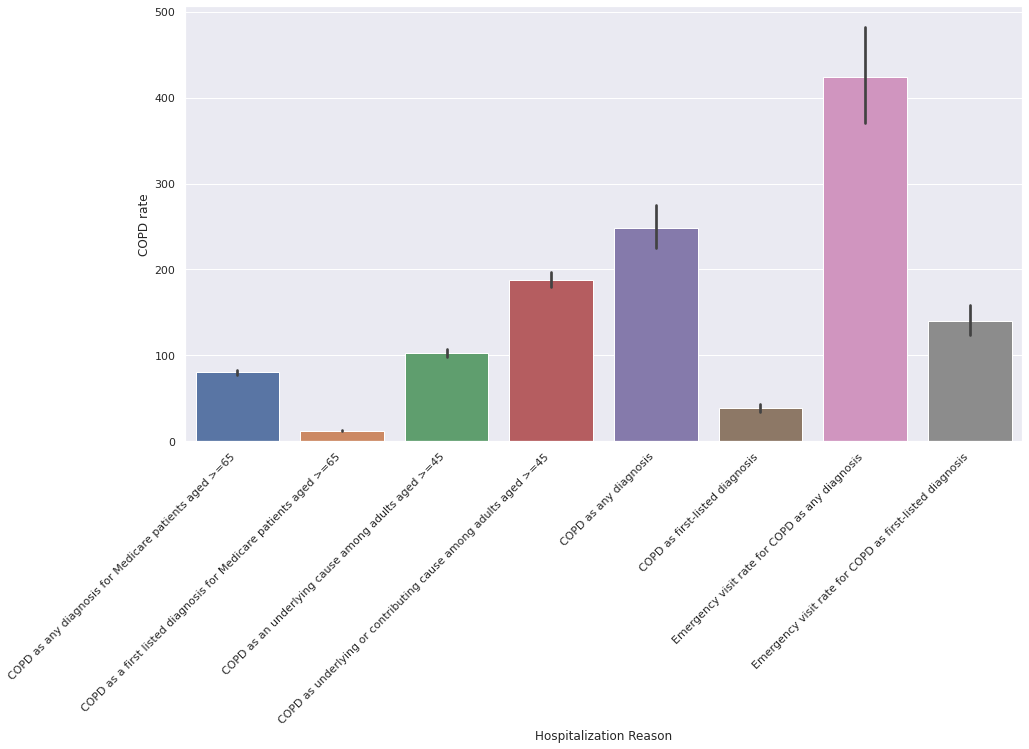

In [19]:
# COPD rates based on hospitalization reasons
#sns.set(rc = {'figure.figsize':(15,8)})
qs = sns.barplot( x = 'Question', y='DataValue', data = merged_df)
qs.set_xticklabels(simplified_reasons, 
                          rotation=45, 
                          horizontalalignment='right')
qs.set(xlabel='Hospitalization Reason', ylabel='COPD rate')
plt.savefig('hospitalization');

In [20]:
merged_df['Question'].unique()

array(['Hospitalization for chronic obstructive pulmonary disease as any diagnosis among Medicare-eligible persons aged >= 65 years',
       'Hospitalization for chronic obstructive pulmonary disease as first-listed diagnosis among Medicare-eligible persons aged >= 65 years',
       'Mortality with chronic obstructive pulmonary disease as underlying cause among adults aged >= 45 years',
       'Mortality with chronic obstructive pulmonary disease as underlying or contributing cause among adults aged >= 45 years',
       'Hospitalization for chronic obstructive pulmonary disease as any diagnosis',
       'Hospitalization for chronic obstructive pulmonary disease as first-listed diagnosis',
       'Emergency department visit rate for chronic obstructive pulmonary disease as any diagnosis',
       'Emergency department visit rate for chronic obstructive pulmonary disease as first-listed diagnosis'],
      dtype=object)

[Text(0.5, 0, 'State'), Text(0, 0.5, 'COPD rate')]

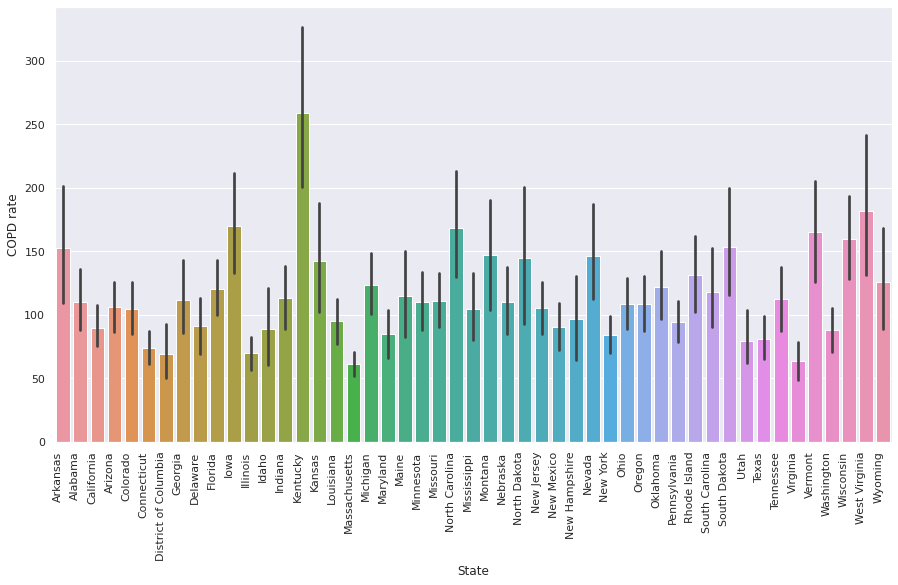

In [21]:
# avg COPD rates based on state
#sns.set(rc = {'figure.figsize':(15,8)})
qs = sns.barplot( x = 'LocationDesc', y='DataValue', data = merged_df)
qs.set_xticklabels(qs.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
qs.set(xlabel='State', ylabel='COPD rate')

[Text(0.5, 0, 'State'), Text(0, 0.5, 'PM25 Concentration (avg/year)')]

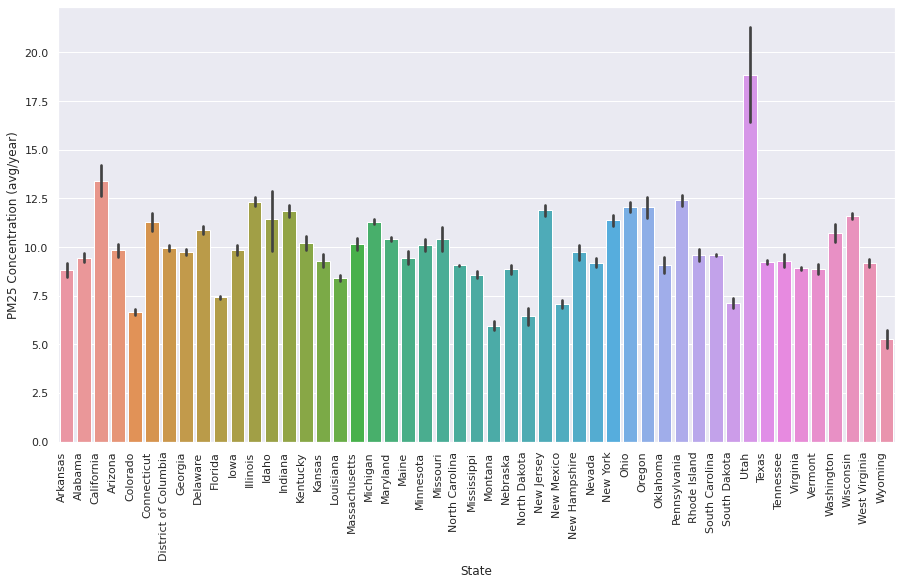

In [22]:
# yearly pm25 rates based on state
#sns.set(rc = {'figure.figsize':(15,8)})
qs = sns.barplot( x = 'LocationDesc', y='ds_pm_pred', data = merged_df)
qs.set_xticklabels(qs.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
qs.set(xlabel='State', ylabel='PM25 Concentration (avg/year)')

### Causal Inference

Question: Do increased levels of air pollution correspond with increased levels of Chronic Obstructive Pulmonary Disease (COPD)?

https://www.sciencedirect.com/science/article/pii/S0160412020319668#:~:text=5%20concentration%2C%20and%20High%20Safety,than%2010%20%CE%BCg%2Fm3.  


##### Methods <br> 
__•Describe which variables correspond to treatment and outcome.__ <br>
Our Control Group consists of Low air pollution values and our Treatment Group consists of High air pollution values. In the article above, 10 ug/m^3 is listed as the threshold for "low" air pollution. The variables that correspond to the outcome of this test are the rates of COPD. <br>

__•Describe which variables (if any) are confounders. If the unconfoundedness assumption holds, make a convincing argument for why.__ <br>
The confounders in our dataset include location, year, race/ethnicity, and hospitalization reasoning. The unconfoundedness assumption means we observe all the relevant confounding variables. I.e. there are no unobserved confounders. The unconfoundedness assumption does not hold. Intuitively and based on our results there should be other variables that have an effect on both treatment and outcome. <br>


__•What methods will you use to adjust for confounders?__ <br>
One technique introduced in lecture used to adjust for confounders we will use is matching. We will need to check the matching algorithm works for our dataset. Each observation will need to have an exact match otherwise the data points will be skewed. (note: Could not figure out how to do the matching algorithm with this dataset, may not work for our particular dataset.) <br>
To combat our confounders, we will use a linear model: COPD Rate = tau + a∗Location ID + b∗Race/Ethnicity + c∗Hospitalization reason + d∗year. This will account for our prediction of the 2 main confounders: Race and Location. However, after further analysis, a linear regression approach and inverse propensity score weighting were better techniques for adjusting for our confounders. <br> 

__•Are there any colliders in the dataset? If so, what are they?__ <br>
In our dataset location and race/ethnicity are are independent causes of hospitalization – the collider (since the two arrowheads collide into hospitalization). <br>

##### Results <br>
__•Summarize and interpret your results, providing a clear statement about causality (or a lack thereof) including any assumptions necessary.__ <br>
We saw that linear regression will not produce an accurate prediction because we got small $R^2$ values and a very negative log-likelihood. After using logistic regression and inverse propensity weighting, we came up with an ATE value of 
-0.75. This result indicates very low casuality between PM2.5 concentration and COPD rates. We used yearly state averages of COPD rates, which may have decreased the accuracy of our regression due to over-smoothing of the data.

__• Where possible, discuss the uncertainty in your estimate and/or the evidence against the hypotheses you are investigating.__ <br>
Our hypothesis was disproven by the investigation we did. Our ATE value of -0.75 indicates that increased levels of air pollution does not correspond to increased rates of COPD. We find this result surprising and we think there are other confounders that we did not account for that are adjusting our results. Without a more robust dataset, we struggled to find a result consistent with our common-sense expectation: that air pollution increases COPD rates.

##### Discussion <br>
__• Elaborate on the limitations of your methods.__<br>
One of the limitations of our analysis is that we did not control for gender, which is a confounder. One of the limitations of matching is that for each observation we need to have an exact match otherwise the data would be skewed. Since our dataset is very complex, we could not use this approach. Therefore, we were limited to a linear model approach, logisitc regression, and inverse propensity weighting. 

__• What additional data would be useful for answering this causal question, and why?__<br>
It may be useful to include an additional column that accounts for gender when answering our causual question because it may be a confounder that has a significant impact on the outcome. Additionally, we could look at county level data as opposed to state level data to improve our accuracy.

__• How confident are you that there’s a causal relationship between your chosen treatment and outcome? Why?__<br>
We are not confident about our causal relationship because of our strange ATE value. It is likely that there are more confounding variables that we did not consider that are affecting our predictions because our ATE value does not line up at all with our hypothesis.


In [23]:
#adding a treatment column with true = treatment group and false = control
merged_df["treatment"] = np.where(merged_df["ds_pm_pred"] < 10, False, True)
len(merged_df[merged_df["treatment"] == True]), len(merged_df[merged_df["treatment"] == False])

(1361, 1755)

<AxesSubplot:xlabel='DataValue', ylabel='Density'>

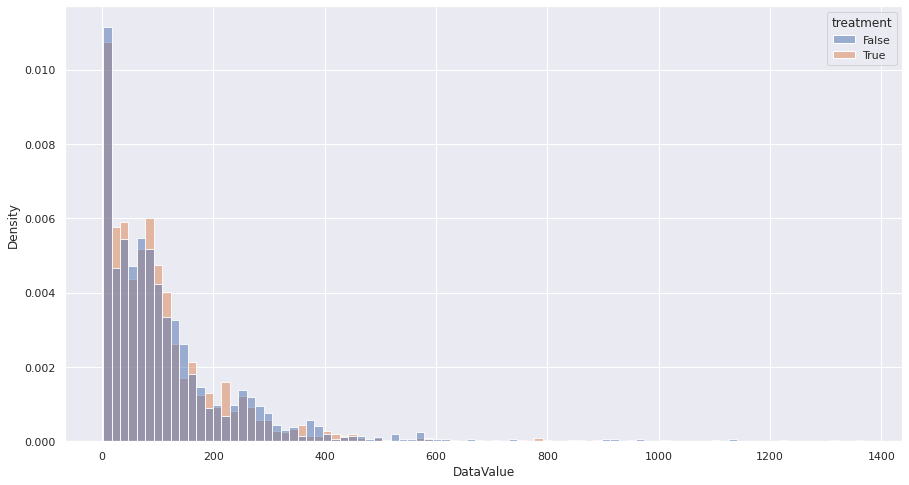

In [24]:
sns.histplot(data=merged_df, x='DataValue', hue='treatment', stat='density', common_norm=False)

In [25]:
inital_tau = merged_df.loc[merged_df['treatment'] == 1, 'DataValue'].mean() - merged_df.loc[merged_df['treatment'] == 0, 'DataValue'].mean()
inital_tau

-10.936345493405028

The negative results leads us to believe there are confounders at work, because we expect rates of COPD to be higher when PM2.5 concentration is higher. To combat our confounders, we will use a linear model:

COPD Rate = $\tau$ + $a*$Location ID + $b*$Race/Ethnicity + $c*$Hospitalization reason + $d*$year

This will account for our prediction of the 2 main confounders: Race and Location.

In [26]:
#code taken from lab 8
def fit_OLS_model(df, target_variable, explanatory_variables, intercept = False):
    """
    Fits an OLS model from data.
    
    Inputs:
        df: pandas DataFrame
        target_variable: string, name of the target variable
        explanatory_variables: list of strings, names of the explanatory variables
        intercept: bool, if True add intercept term
    Outputs:
        fitted_model: model containing OLS regression results
    """
    
    target = df[target_variable]
    inputs = df[explanatory_variables]
    if intercept:
        inputs = sm.add_constant(inputs)
    
    fitted_model = sm.OLS(target, inputs).fit()
    return(fitted_model)

def mean_squared_error(true_vals, predicted_vals):
    """
    Return the mean squared error
    
    Inputs:
        true_vals: array of true labels
        predicted_vals: array labels predicted from the data
    Output:
        float, mean squared error of the predicted values
    """
    return np.mean((true_vals - predicted_vals) ** 2)

We can see here that linear regression will not produce an accurate prediction because we have a small $R^2$ values and a very negative log-likelihood.

In [27]:
merged_df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115],
           dtype='int64', length=3116)

In [28]:
CDC_COPD_clean.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'DataValueUnit', 'DataValueType', 'DataValue',
       'DataValueAlt', 'DataValueFootnoteSymbol', 'DatavalueFootnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1',
       'Stratification1', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1'],
      dtype='object')

In [29]:
CDC_COPD_clean['DataValueUnit'].unique()

array(['cases per 100,000', 'cases per 1,000', nan, 'cases per 10,000',
       'Number', '%'], dtype=object)

In [30]:
merged_df.columns

Index(['year', 'LocationDesc', 'Topic', 'Question', 'DataValue',
       'Race/Ethnicity', 'LocationID', 'QuestionID',
       'Stratification_American Indian or Alaska Native',
       'Stratification_Asian or Pacific Islander',
       'Stratification_Black, non-Hispanic', 'Stratification_Hispanic',
       'Stratification_White, non-Hispanic', 'ds_pm_pred', 'treatment'],
      dtype='object')

In [31]:
#new merged data table
COPD_PM25_merge = CDC_COPD_clean.merge(pm25_mean_merged, left_on = ['YearStart', 'LocationID'], right_on = ['year', 'LocationID'])
COPD_PM25_merge = COPD_PM25_merge.drop(labels = ['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource', 'Topic', 'DataValueFootnoteSymbol', "LowConfidenceLimit", 'HighConfidenceLimit'], axis = 1)
COPD_PM25_merge = COPD_PM25_merge[COPD_PM25_merge['DataValue'].notnull()]
COPD_PM25_merge = COPD_PM25_merge[COPD_PM25_merge['DataValueUnit'].notnull()]
COPD_PM25_merge

,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DatavalueFootnote,StratificationCategory1,Stratification1,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,year,ds_pm_pred
0,Mortality with chronic obstructive pulmonary d...,"cases per 100,000",Crude Rate,172.40,172.40,NaN,Race/Ethnicity,"White, non-Hispanic",1,COPD,COPD1_1,CRDRATE,RACE,WHT,2011.0,10.801224
2,Hospitalization for chronic obstructive pulmon...,"cases per 1,000",Crude Rate,18.99,18.99,NaN,Race/Ethnicity,"White, non-Hispanic",1,COPD,COPD5_3,CRDRATE,RACE,WHT,2011.0,10.801224
5,Hospitalization for chronic obstructive pulmon...,"cases per 1,000",Age-adjusted Rate,90.31,90.31,NaN,Race/Ethnicity,"Black, non-Hispanic",1,COPD,COPD5_4,AGEADJRATE,RACE,BLK,2011.0,10.801224
8,Hospitalization for chronic obstructive pulmon...,"cases per 1,000",Crude Rate,14.33,14.33,NaN,Race/Ethnicity,"Black, non-Hispanic",1,COPD,COPD5_3,CRDRATE,RACE,BLK,2011.0,10.801224
9,Mortality with chronic obstructive pulmonary d...,"cases per 100,000",Age-adjusted Rate,193.50,193.50,NaN,Gender,Male,1,COPD,COPD1_1,AGEADJRATE,GENDER,GENM,2011.0,10.801224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50534,Prevalence of current smoking among adults >= ...,%,Age-adjusted Prevalence,41.20,41.20,NaN,Gender,Male,56,COPD,COPD3_0,AGEADJPREV,GENDER,GENM,2012.0,5.019771
50535,Prevalence of activity limitation among adults...,%,Age-adjusted Prevalence,58.40,58.40,NaN,Gender,Female,56,COPD,COPD4_0_1,AGEADJPREV,GENDER,GENF,2012.0,5.019771
50536,Influenza vaccination among noninstitutionaliz...,%,Crude Prevalence,62.50,62.50,NaN,Gender,Male,56,COPD,COPD7_0,CRDPREV,GENDER,GENM,2012.0,5.019771
50537,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,6.80,6.80,NaN,Overall,Overall,56,COPD,COPD2_0,AGEADJPREV,OVERALL,OVR,2012.0,5.019771


In [32]:
#adding treatment vals and encoding race and reason
COPD_PM25_merge["treatment"] = np.where(COPD_PM25_merge["ds_pm_pred"] < 10, False, True)

race_vals = dict(zip(COPD_PM25_merge['StratificationID1'].unique(), np.arange(0, len(COPD_PM25_merge['StratificationID1'].unique()))))
question_code_vals = dict(zip(merged_df['Question'].unique(), np.arange(0, len(merged_df['Question'].unique()))))
COPD_PM25_merge["RaceID"] = COPD_PM25_merge['StratificationID1'].map(race_vals) 
COPD_PM25_merge['reasonID'] = COPD_PM25_merge["Question"].map(question_code_vals)
COPD_PM25_merge

,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DatavalueFootnote,StratificationCategory1,Stratification1,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,year,ds_pm_pred,treatment,RaceID,reasonID
0,Mortality with chronic obstructive pulmonary d...,"cases per 100,000",Crude Rate,172.40,172.40,NaN,Race/Ethnicity,"White, non-Hispanic",1,COPD,COPD1_1,CRDRATE,RACE,WHT,2011.0,10.801224,True,0,2.0
2,Hospitalization for chronic obstructive pulmon...,"cases per 1,000",Crude Rate,18.99,18.99,NaN,Race/Ethnicity,"White, non-Hispanic",1,COPD,COPD5_3,CRDRATE,RACE,WHT,2011.0,10.801224,True,0,1.0
5,Hospitalization for chronic obstructive pulmon...,"cases per 1,000",Age-adjusted Rate,90.31,90.31,NaN,Race/Ethnicity,"Black, non-Hispanic",1,COPD,COPD5_4,AGEADJRATE,RACE,BLK,2011.0,10.801224,True,1,0.0
8,Hospitalization for chronic obstructive pulmon...,"cases per 1,000",Crude Rate,14.33,14.33,NaN,Race/Ethnicity,"Black, non-Hispanic",1,COPD,COPD5_3,CRDRATE,RACE,BLK,2011.0,10.801224,True,1,1.0
9,Mortality with chronic obstructive pulmonary d...,"cases per 100,000",Age-adjusted Rate,193.50,193.50,NaN,Gender,Male,1,COPD,COPD1_1,AGEADJRATE,GENDER,GENM,2011.0,10.801224,True,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50534,Prevalence of current smoking among adults >= ...,%,Age-adjusted Prevalence,41.20,41.20,NaN,Gender,Male,56,COPD,COPD3_0,AGEADJPREV,GENDER,GENM,2012.0,5.019771,False,2,NaN
50535,Prevalence of activity limitation among adults...,%,Age-adjusted Prevalence,58.40,58.40,NaN,Gender,Female,56,COPD,COPD4_0_1,AGEADJPREV,GENDER,GENF,2012.0,5.019771,False,5,NaN
50536,Influenza vaccination among noninstitutionaliz...,%,Crude Prevalence,62.50,62.50,NaN,Gender,Male,56,COPD,COPD7_0,CRDPREV,GENDER,GENM,2012.0,5.019771,False,2,NaN
50537,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,6.80,6.80,NaN,Overall,Overall,56,COPD,COPD2_0,AGEADJPREV,OVERALL,OVR,2012.0,5.019771,False,3,NaN


In [33]:
COPD_PM25_merge['DataValueUnit'].unique()

array(['cases per 100,000', 'cases per 1,000', '%', 'cases per 10,000'],
      dtype=object)

In [34]:
#changing all COPD rates to percents where we can
cases100thou = COPD_PM25_merge.where(COPD_PM25_merge["DataValueUnit"] == 'cases per 100,000')
cases10thou = COPD_PM25_merge.where(COPD_PM25_merge["DataValueUnit"] == 'cases per 10,000')
cases1thou = COPD_PM25_merge.where(COPD_PM25_merge["DataValueUnit"] == 'cases per 1,000')

percent100thou = cases100thou['DataValue'] / 100000 * 100
percent10thou = cases10thou['DataValue'] / 10000 * 100
percent1thou = cases1thou['DataValue'] / 1000 * 100

cases100thou['PercentRateCOPD'] = percent100thou
cases10thou['PercentRateCOPD'] = percent10thou
cases1thou['PercentRateCOPD'] = percent10thou

cases100thou = cases100thou[cases100thou['DataValue'].notnull()]
cases10thou = cases10thou[cases10thou['DataValue'].notnull()]
cases1thou = cases100thou[cases1thou['DataValue'].notnull()]

adjusted_combined = pd.concat([cases100thou, cases10thou, cases1thou])
adjusted_combined

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DatavalueFootnote,StratificationCategory1,Stratification1,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,year,ds_pm_pred,treatment,RaceID,reasonID,PercentRateCOPD
0,Mortality with chronic obstructive pulmonary d...,"cases per 100,000",Crude Rate,172.40,172.40,NaN,Race/Ethnicity,"White, non-Hispanic",1.0,COPD,COPD1_1,CRDRATE,RACE,WHT,2011.0,10.801224,1.0,0.0,2.0,0.1724
9,Mortality with chronic obstructive pulmonary d...,"cases per 100,000",Age-adjusted Rate,193.50,193.50,NaN,Gender,Male,1.0,COPD,COPD1_1,AGEADJRATE,GENDER,GENM,2011.0,10.801224,1.0,2.0,2.0,0.1935
17,Mortality with chronic obstructive pulmonary d...,"cases per 100,000",Crude Rate,248.00,248.00,NaN,Overall,Overall,1.0,COPD,COPD1_2,CRDRATE,OVERALL,OVR,2011.0,10.801224,1.0,3.0,3.0,0.2480
18,Mortality with chronic obstructive pulmonary d...,"cases per 100,000",Crude Rate,157.70,157.70,NaN,Gender,Male,1.0,COPD,COPD1_1,CRDRATE,GENDER,GENM,2011.0,10.801224,1.0,2.0,2.0,0.1577
31,Mortality with chronic obstructive pulmonary d...,"cases per 100,000",Crude Rate,129.20,129.20,NaN,Race/Ethnicity,"Black, non-Hispanic",1.0,COPD,COPD1_2,CRDRATE,RACE,BLK,2011.0,10.801224,1.0,1.0,3.0,0.1292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49150,Hospitalization for chronic obstructive pulmon...,"cases per 10,000",Age-adjusted Rate,82.94,82.94,NaN,Overall,Overall,54.0,COPD,COPD5_1,AGEADJRATE,OVERALL,OVR,2014.0,8.627988,0.0,3.0,5.0,0.8294
49167,Hospitalization for chronic obstructive pulmon...,"cases per 10,000",Crude Rate,113.12,113.12,NaN,Race/Ethnicity,Hispanic,54.0,COPD,COPD5_1,CRDRATE,RACE,HIS,2014.0,8.627988,0.0,8.0,5.0,1.1312
49170,Hospitalization for chronic obstructive pulmon...,"cases per 10,000",Age-adjusted Rate,256.34,256.34,NaN,Race/Ethnicity,"Black, non-Hispanic",54.0,COPD,COPD5_2,AGEADJRATE,RACE,BLK,2014.0,8.627988,0.0,1.0,4.0,2.5634
49178,Hospitalization for chronic obstructive pulmon...,"cases per 10,000",Crude Rate,32.83,32.83,NaN,Race/Ethnicity,"Black, non-Hispanic",54.0,COPD,COPD5_1,CRDRATE,RACE,BLK,2014.0,8.627988,0.0,1.0,5.0,0.3283


In [35]:
adjusted_combined.columns

Index(['Question', 'DataValueUnit', 'DataValueType', 'DataValue',
       'DataValueAlt', 'DatavalueFootnote', 'StratificationCategory1',
       'Stratification1', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'year', 'ds_pm_pred', 'treatment', 'RaceID', 'reasonID',
       'PercentRateCOPD'],
      dtype='object')

In [36]:
minimal_data = adjusted_combined.drop(['Question', 'TopicID', "QuestionID", 'DataValueUnit', 'DataValueType', 'DataValueAlt', 'DatavalueFootnote', 'StratificationCategory1', 'Stratification1', 'StratificationCategoryID1', 'DataValueTypeID', 'StratificationID1', 'DataValue'], axis = 1)
minimal_data.columns
minimal_data["row"] = minimal_data.index

In [37]:
linear_model_adjusted = fit_OLS_model(adjusted_combined, 'PercentRateCOPD', ['ds_pm_pred', 'RaceID', 'LocationID', 'reasonID', 'year'])
print(linear_model_adjusted.summary())

                                 OLS Regression Results                                
Dep. Variable:        PercentRateCOPD   R-squared (uncentered):                   0.448
Model:                            OLS   Adj. R-squared (uncentered):              0.448
Method:                 Least Squares   F-statistic:                              1072.
Date:                Mon, 09 May 2022   Prob (F-statistic):                        0.00
Time:                        21:09:22   Log-Likelihood:                         -10613.
No. Observations:                6606   AIC:                                  2.124e+04
Df Residuals:                    6601   BIC:                                  2.127e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [38]:
from sklearn.linear_model import LogisticRegression
T, Y = 'treatment', 'PercentRateCOPD'
X = minimal_data.columns.drop([T, Y])
log_model = LogisticRegression(C=1e6).fit(minimal_data[X], minimal_data[T])

data_log_reg = minimal_data.assign(propensity_score=log_model.predict_proba(minimal_data[X])[:, 1])
data_log_reg

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,LocationID,year,ds_pm_pred,treatment,RaceID,reasonID,PercentRateCOPD,row,propensity_score
0,1.0,2011.0,10.801224,1.0,0.0,2.0,0.1724,0,1.000000e+00
9,1.0,2011.0,10.801224,1.0,2.0,2.0,0.1935,9,1.000000e+00
17,1.0,2011.0,10.801224,1.0,3.0,3.0,0.2480,17,1.000000e+00
18,1.0,2011.0,10.801224,1.0,2.0,2.0,0.1577,18,1.000000e+00
31,1.0,2011.0,10.801224,1.0,1.0,3.0,0.1292,31,1.000000e+00
...,...,...,...,...,...,...,...,...,...
49150,54.0,2014.0,8.627988,0.0,3.0,5.0,0.8294,49150,8.019353e-162
49167,54.0,2014.0,8.627988,0.0,8.0,5.0,1.1312,49167,1.807711e-162
49170,54.0,2014.0,8.627988,0.0,1.0,4.0,2.5634,49170,5.210211e-159
49178,54.0,2014.0,8.627988,0.0,1.0,5.0,0.3283,49178,1.738496e-161


In [39]:
weight_t1 = 1/data_log_reg.query("treatment==1")["propensity_score"]
weight_nt1 = 1/(1-data_log_reg.query("treatment==0")["propensity_score"])
weight1 = ((data_log_reg["treatment"]-data_log_reg["propensity_score"]) /
          (data_log_reg["propensity_score"]*(1-data_log_reg["propensity_score"])))

newy1 = sum(data_log_reg.query("treatment==1")["PercentRateCOPD"]*weight_t1) / len(minimal_data)
newy0 = sum(data_log_reg.query("treatment==0")["PercentRateCOPD"]*weight_nt1) / len(minimal_data)

ate1 = np.mean(weight1 * data_log_reg["PercentRateCOPD"])

print("ATE", ate1)

ATE -0.7586362682431123


In [40]:
inital_tau

-10.936345493405028

### Multiple Hypothesis Testing/ Decision Making

Question 2: Do increased regulations correspond with decreased chronic illnesses? 

In this section, we use the ELI Database of State IAQ Laws dataset from the folllowing website: https://www.eli.org/buildings/database-state-indoor-air-quality-laws. This dataset gives us access to the various state policies that have been implemented to improve indoor air quality.

In [41]:
#pulled from https://gist.github.com/JeffPaine/3083347
states_abbr = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

states_dict = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}


In [42]:
#dictionary to track number of state laws
state_counts = dict(zip(states_abbr, np.zeros(51)))

In [43]:
#function to count state laws
def scrape_page(text):
    for state in states_abbr:
        state_name = state + '\n'
        count = text.count(state_name)
        state_counts[state] += count
    return

In [44]:
import fitz
#getting number of state laws for every page of doc
with fitz.open("2022 IAQ Database.pdf") as doc:
    for page in doc:
        text = page.get_text()
        scrape_page(text)

In [45]:
# Dataset 2: Number of State Regulations
#convert dictionary to dataframe
data_items = state_counts.items()
data_list = list(data_items)
state_laws = pd.DataFrame(data_list, columns=['State', 'NumLaws'])
state_laws.head()

,State,NumLaws
0,AK,2.0
1,AL,0.0
2,AR,4.0
3,AZ,4.0
4,CA,25.0


In [46]:
CDC_chronic_diseases['Topic'].unique()

array(['Cardiovascular Disease', 'Asthma', 'Alcohol', 'Tobacco',
       'Overarching Conditions', 'Chronic Kidney Disease', 'Diabetes',
       'Reproductive Health', 'Cancer', 'Arthritis', 'Oral Health',
       'Chronic Obstructive Pulmonary Disease',
       'Nutrition, Physical Activity, and Weight Status', 'Older Adults',
       'Disability', 'Mental Health', 'Immunization'], dtype=object)

The 6 diseases we will use in our tests are:
- Cardiovascular Disease
- Asthma
- Chronic Obstructive Pulmonary Disease
- Cancer
- Tobacco
- Alcohol

We divide the data into 2 groups: states with high number of regulations and states with low number of regulations, which are the treatment and control groups respectively.

The threshold we set is that states with 5 or more regulations correspond to "highly regulated states" (treatment group) and states with less than 5 regulations correspond to "low regulated states" (control group).

Our test statistic is the difference in means of the highly regulated group and low regulated group (treatment group and control group respectively).

In [47]:
diseases_to_test = np.array(['Cardiovascular Disease', 'Asthma', 'Chronic Obstructive Pulmonary Disease', 'Cancer', 'Tobacco', 'Alcohol'])
p_vals = [] #will be filled in same order as above

<AxesSubplot:xlabel='State', ylabel='NumLaws'>

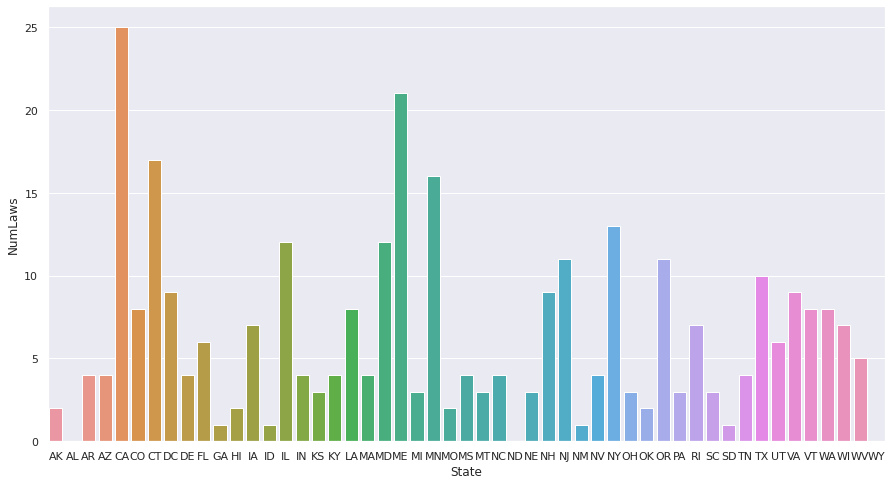

In [48]:
sns.barplot( x = 'State', y='NumLaws', data = state_laws)

In [49]:
treatment_states = state_laws.where(state_laws['NumLaws'] > 5).dropna()
control_states = state_laws.where(state_laws['NumLaws'] <= 5).dropna()
treatment_state_names = np.array(treatment_states['State'])
control_state_names = np.array(control_states['State'])
len(control_state_names), len(treatment_state_names)

(29, 22)

In [50]:
#getting only cardio disease for first p-val
cardio_disease_big = CDC_chronic_diseases.where(CDC_chronic_diseases['Topic'] == 'Cardiovascular Disease')

In [51]:
cardio_disease = cardio_disease_big.where(cardio_disease_big['DataValueType'] == 'Number')

In [52]:
cardio_disease = cardio_disease[cardio_disease['DataValueType'].notnull()]

In [53]:
# dividing cardiovascular disease dataset into control and treatment groups
cardio_control = cardio_disease.where(cardio_disease["LocationAbbr"].isin(control_state_names))
cardio_control = cardio_control[cardio_control['DataValue'].notnull()]
cardio_treatment = cardio_disease.where(cardio_disease["LocationAbbr"].isin(treatment_state_names))
cardio_treatment = cardio_treatment[cardio_treatment['DataValue'].notnull()]

In [54]:
cardio_control['DataValue'] = cardio_control['DataValue'].astype('float64')
cardio_treatment['DataValue'] = cardio_treatment['DataValue'].astype('float64')

In [55]:
import scipy.stats as stats

#conducting t-test and retrieving the p-value for our analysis
t_stat_cardio, p_val_cardio = stats.ttest_ind(np.array(cardio_control['DataValue']), np.array(cardio_treatment['DataValue']), equal_var = False, alternative='greater', random_state=38)
p_vals.append(p_val_cardio)
print(t_stat_cardio, p_val_cardio)

-17.220806411635518 1.0


asthma:

In [56]:
#getting only asthma for second p-val
asthma_disease_big = CDC_chronic_diseases.where(CDC_chronic_diseases['Topic'] == 'Asthma')
asthma_disease = asthma_disease_big.where(asthma_disease_big['DataValueType'] == 'Number')
asthma_disease = asthma_disease[asthma_disease['DataValue'].notnull()]

In [57]:
# dividing asthma dataset into control and treatment groups
asthma_control = asthma_disease.where(asthma_disease["LocationAbbr"].isin(control_state_names))
asthma_control = asthma_control[asthma_control['DataValue'].notnull()]
asthma_treatment = asthma_disease.where(asthma_disease["LocationAbbr"].isin(treatment_state_names))
asthma_treatment = asthma_treatment[asthma_treatment['DataValue'].notnull()]

In [58]:
asthma_control['DataValue'] = asthma_control['DataValue'].astype('float64')
asthma_treatment['DataValue'] = asthma_treatment['DataValue'].astype('float64')

#conducting t-test and retrieving the p-value for our analysis
t_stat_asthma, p_val_asthma = stats.ttest_ind(np.array(asthma_control['DataValue']), np.array(asthma_treatment['DataValue']), equal_var = False, alternative='greater', random_state=38)
p_vals.append(p_val_asthma)
print(t_stat_asthma, p_val_asthma)

-5.252987298437799 0.9999999185150269


COPD:

In [59]:
#getting only COPD for third p-val
COPD_big = CDC_chronic_diseases.where(CDC_chronic_diseases['Topic'] == 'Chronic Obstructive Pulmonary Disease')

In [60]:
COPD_disease = COPD_big.where(COPD_big['DataValueType'] == 'Number')

In [61]:
COPD_disease = COPD_disease[COPD_disease['DataValue'].notnull()]

In [62]:
# dividing COPD dataset into control and treatment groups
COPD_control = COPD_disease.where(COPD_disease["LocationAbbr"].isin(control_state_names))
COPD_control = COPD_control[COPD_control['DataValue'].notnull()]
COPD_treatment = COPD_disease.where(COPD_disease["LocationAbbr"].isin(treatment_state_names))
COPD_treatment = COPD_treatment[COPD_treatment['DataValue'].notnull()]

In [63]:
COPD_control['DataValue'] = COPD_control['DataValue'].astype('float64')
COPD_treatment['DataValue'] = COPD_treatment['DataValue'].astype('float64')

#conducting t-test and retrieving the p-value for our analysis
t_stat_COPD, p_val_COPD = stats.ttest_ind(np.array(COPD_control['DataValue']), np.array(COPD_treatment['DataValue']), equal_var = False, alternative='greater', random_state=38)
p_vals.append(p_val_COPD)
print(t_stat_COPD, p_val_COPD)

-7.5170359843061965 0.9999999999999701


Cancer:

In [64]:
#getting only cancer for fourth p-val
cancer_big = CDC_chronic_diseases.where(CDC_chronic_diseases['Topic'] == 'Cancer')

In [65]:
cancer_disease = cancer_big.where(cancer_big['DataValueType'] == 'Average Annual Number')


In [66]:
cancer_disease = cancer_disease[cancer_disease['DataValue'].notnull()]

In [67]:
# dividing cancer dataset into control and treatment groups
cancer_control = cancer_disease.where(cancer_disease["LocationAbbr"].isin(control_state_names))
cancer_control = cancer_control[cancer_control['DataValue'].notnull()]
cancer_treatment = cancer_disease.where(cancer_disease["LocationAbbr"].isin(treatment_state_names))
cancer_treatment = cancer_treatment[cancer_treatment['DataValue'].notnull()]

In [68]:
cancer_control['DataValue'] = cancer_control['DataValue'].astype('float64')
cancer_treatment['DataValue'] = cancer_treatment['DataValue'].astype('float64')

#conducting t-test and retrieving the p-value for our analysis
t_stat_cancer, p_val_cancer = stats.ttest_ind(np.array(cancer_control['DataValue']), np.array(cancer_treatment['DataValue']), equal_var = False, alternative='greater', random_state=38)
p_vals.append(p_val_cancer)
print(t_stat_cancer, p_val_cancer)

-12.479354926322683 1.0


Tobacco:

In [69]:
#getting only tobacco for fifth p-val
tobacco_big = CDC_chronic_diseases.where(CDC_chronic_diseases['Topic'] == 'Tobacco')

In [70]:
tobacco_disease = tobacco_big[tobacco_big['DataValueType'] == 'Number']

In [71]:
tobacco_disease = tobacco_disease[tobacco_disease['DataValue'].notnull()]

In [72]:
# dividing tobacco dataset into control and treatment groups
tobacco_control = tobacco_disease.where(tobacco_disease["LocationAbbr"].isin(control_state_names))
tobacco_control = tobacco_control[tobacco_control['DataValue'].notnull()]
tobacco_treatment = tobacco_disease.where(tobacco_disease["LocationAbbr"].isin(treatment_state_names))
tobacco_treatment = tobacco_treatment[tobacco_treatment['DataValue'].notnull()]

In [73]:
tobacco_control['DataValue'] = tobacco_control['DataValue'].astype('float64')
tobacco_treatment['DataValue'] = tobacco_treatment['DataValue'].astype('float64')

#conducting t-test and retrieving the p-value for our analysis
t_stat_tobacco, p_val_tobacco = stats.ttest_ind(np.array(tobacco_control['DataValue']), np.array(tobacco_treatment['DataValue']), equal_var = False, alternative='greater', random_state=38)
p_vals.append(p_val_tobacco)
print(t_stat_tobacco, p_val_tobacco)

7.323323104881993 1.231665596463852e-12


Alcohol:

In [74]:
#getting only alc for sixth p-val
alcohol_big = CDC_chronic_diseases[CDC_chronic_diseases['Topic'] == 'Alcohol']

In [75]:
alcohol_disease = alcohol_big.where(alcohol_big['DataValueType'] == 'Number')

In [76]:
alcohol_disease = alcohol_disease[alcohol_disease['DataValue'].notnull()]

In [77]:
# dividing alcohol dataset into control and treatment groups
alcohol_control = alcohol_disease.where(alcohol_disease["LocationAbbr"].isin(control_state_names))
alcohol_control = alcohol_control[alcohol_control['DataValue'].notnull()]
alcohol_treatment = alcohol_disease.where(alcohol_disease["LocationAbbr"].isin(treatment_state_names))
alcohol_treatment = alcohol_treatment[alcohol_treatment['DataValue'].notnull()]

In [78]:
alcohol_control['DataValue'] = alcohol_control['DataValue'].astype('float64')
alcohol_treatment['DataValue'] = alcohol_treatment['DataValue'].astype('float64')

#conducting t-test and retrieving the p-value for our analysis
t_stat_alcohol, p_val_alcohol = stats.ttest_ind(np.array(alcohol_control['DataValue']), np.array(alcohol_treatment['DataValue']), equal_var = False, alternative='greater', random_state=38)
p_vals.append(p_val_alcohol)
print(t_stat_alcohol, p_val_alcohol)

-8.721961998664998 1.0


In [79]:
diseases_to_test

array(['Cardiovascular Disease', 'Asthma',
       'Chronic Obstructive Pulmonary Disease', 'Cancer', 'Tobacco',
       'Alcohol'], dtype='<U37')

In [80]:
# compare p-values to diseases_to_test array. The p-values correspond to the diseases in that array and can be
# matched by their indexes
p_vals = np.array(p_vals)
p_vals 

array([1.00000000e+00, 9.99999919e-01, 1.00000000e+00, 1.00000000e+00,
       1.23166560e-12, 1.00000000e+00])

Now we will control alpha.

In [81]:
# code produced in lab 1
def benjamini_hochberg(p_values, alpha):
    """
    Returns decisions on p-values using Benjamini-Hochberg.
    
    Inputs:
        p_values: array of p-values
        alpha: desired FDR (FDR = E[# false positives / # positives])
    
    Returns:
        decisions: binary array of same length as p-values, where `decisions[i]` is 1
        if `p_values[i]` is deemed significant, and 0 otherwise
    """
    sorted_p_values = np.sort(p_values) 
    threshold = sorted_p_values[0]
    for i in range(len(p_values)):
        if sorted_p_values[i] < (i+1) * alpha / len(p_values):
            threshold = sorted_p_values[i]
    decisions = p_values <= threshold
    return decisions

In [82]:
#code produced in lab 1
def bonferroni(p_values, alpha_total):
    """
    Returns decisions on p-values using the Bonferroni correction.
    
    Inputs:
        p_values: array of p-values
        alpha_total: desired family-wise error rate (FWER = P(at least one false discovery))
    
    Returns:
        decisions: binary array of same length as p-values, where `decisions[i]` is 1
        if `p_values[i]` is deemed significant, and 0 otherwise
    """

    decisions = p_values <= (alpha_total / len(p_values))
    return decisions

In [83]:
bonferroni_decisions = bonferroni(p_vals, 0.05)
BH_decisions = benjamini_hochberg(p_vals, 0.05)

In [84]:
bonferroni_decisions

array([False, False, False, False,  True, False])

In [85]:
BH_decisions

array([False, False, False, False,  True, False])

In [86]:
diseases_to_test

array(['Cardiovascular Disease', 'Asthma',
       'Chronic Obstructive Pulmonary Disease', 'Cancer', 'Tobacco',
       'Alcohol'], dtype='<U37')

In [87]:
p_vals

array([1.00000000e+00, 9.99999919e-01, 1.00000000e+00, 1.00000000e+00,
       1.23166560e-12, 1.00000000e+00])

In [88]:
#decisions: binary array of same length as p-values, where `decisions[i]` is true
# if `p_values[i]` is deemed significant, and false otherwise
decisions = pd.DataFrame()
decisions["diseases"] = diseases_to_test
decisions["p-value"] = p_vals
decisions["Bonferroni decisions"] = bonferroni_decisions
decisions["B-H decisions"] = BH_decisions
decisions

,diseases,p-value,Bonferroni decisions,B-H decisions
0,Cardiovascular Disease,1.000000e+00,False,False
1,Asthma,9.999999e-01,False,False
2,Chronic Obstructive Pulmonary Disease,1.000000e+00,False,False
3,Cancer,1.000000e+00,False,False
4,Tobacco,1.231666e-12,True,True
5,Alcohol,1.000000e+00,False,False


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=03c36464-3e18-408f-9bf1-2a80c504b533' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>